# Lab 3: Знайомство з нейромережами

1. Повнозв'язані нейронні мережі

Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 


2. Згорткові нейронні мережі

Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

3. Рекурентні нейронні мережі

Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

In [21]:
#1

import pandas as pd

data = pd.read_csv("jobclassinfo2.csv")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat_name in ['JobFamilyDescription','JobClassDescription','PG']: 
    data[feat_name] = le.fit_transform(data[feat_name])

from sklearn.preprocessing import StandardScaler

features = data.drop(['ID','PG'],axis=1).columns
X = data[features].values
y = data['PG'].values

scaler = preprocessing.MinMaxScaler()
X_std = scaler.fit_transform(X)

In [22]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size=0.2,stratify=y)

In [24]:
#FNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1],), activation="sigmoid"))# input layer
model.add(Dense(32, activation="sigmoid"))#hiddenlayer
model.add(Dense(len(data['PG'].unique()), activation="softmax"))#output layer

opt = Adam(learning_rate = 0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=2)

Epoch 1/100
26/26 [==============================] - 1s 7ms/step - loss: 2.4220 - accuracy: 0.2115 - val_loss: 2.2168 - val_accuracy: 0.2143
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 2.2447 - accuracy: 0.2308 - val_loss: 2.1464 - val_accuracy: 0.2143
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 2.1705 - accuracy: 0.2885 - val_loss: 2.0965 - val_accuracy: 0.2143
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 2.0702 - accuracy: 0.2692 - val_loss: 1.9508 - val_accuracy: 0.2857
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 1.9242 - accuracy: 0.2885 - val_loss: 1.7635 - val_accuracy: 0.2857
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 1.7802 - accuracy: 0.3654 - val_loss: 1.6336 - val_accuracy: 0.2857
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 1.7026 - accuracy: 0.3654 - val_loss: 1.5770 - val_accuracy: 0.4286
Epoch 8/100
2

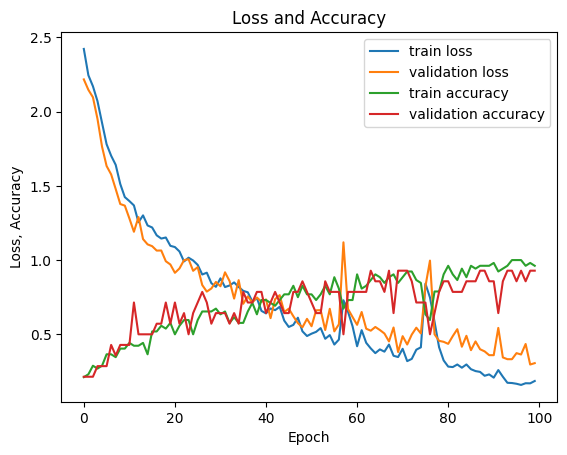

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 100), history.history["accuracy"], label="train accuracy")
plt.plot(np.arange(0, 100), history.history["val_accuracy"], label="validation accuracy")
plt.title("Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss, Accuracy")
plt.legend()

In [26]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1)))

1/1 [==============================] - 0s 82ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.93        14
   macro avg       0.97      0.94      0.95        14
weighted avg       0.95      0.93      0.92        14



DecisionTreeClassifier - accuracy=0.89

FNN - accuracy=0.79

Стало гірше на 10%

In [27]:
#2 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

data = ImageDataGenerator(rescale = 1.0/255.).flow_from_directory("cnn",target_size=(64, 64),shuffle=0)

Found 923 images belonging to 2 classes.


In [28]:
images=np.concatenate([data.next()[0] for i in range(data.__len__())]) 
labels=np.concatenate([data.next()[1] for i in range(data.__len__())])

In [29]:
labels_name = ['bleached_corals','healthy_corals']

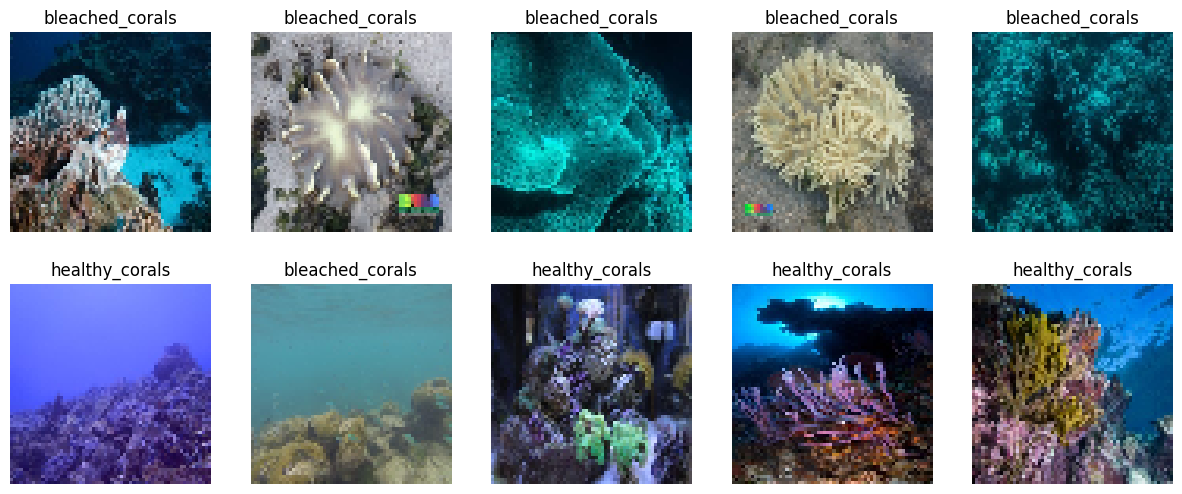

In [30]:
plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    index = int(np.random.randint(0,images.shape[0],1))
    plt.imshow(images[index])
    plt.title(labels_name[np.argmax(labels[index])])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.3,stratify=labels)

In [32]:
#CNN

from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=images[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(2,activation = "sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.3)

Epoch 1/15
15/15 [==============================] - 4s 192ms/step - loss: 0.7453 - accuracy: 0.5686 - val_loss: 0.6304 - val_accuracy: 0.7268
Epoch 2/15
15/15 [==============================] - 3s 173ms/step - loss: 0.5849 - accuracy: 0.7013 - val_loss: 0.6605 - val_accuracy: 0.6392
Epoch 3/15
15/15 [==============================] - 3s 179ms/step - loss: 0.5532 - accuracy: 0.7212 - val_loss: 0.5551 - val_accuracy: 0.7320
Epoch 4/15
15/15 [==============================] - 3s 174ms/step - loss: 0.5739 - accuracy: 0.6991 - val_loss: 0.5843 - val_accuracy: 0.7062
Epoch 5/15
15/15 [==============================] - 3s 175ms/step - loss: 0.5283 - accuracy: 0.7345 - val_loss: 0.5168 - val_accuracy: 0.7371
Epoch 6/15
15/15 [==============================] - 3s 180ms/step - loss: 0.5121 - accuracy: 0.7478 - val_loss: 0.5514 - val_accuracy: 0.7216
Epoch 7/15
15/15 [==============================] - 3s 178ms/step - loss: 0.4542 - accuracy: 0.7920 - val_loss: 0.5235 - val_accuracy: 0.7216
Epoch 

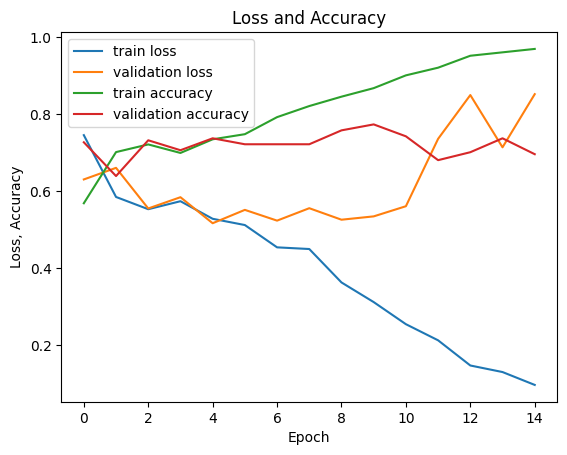

In [33]:
plt.figure()
plt.plot(np.arange(0, 15), history.history["loss"], label="train loss")
plt.plot(np.arange(0, 15), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 15), history.history["accuracy"], label="train accuracy")
plt.plot(np.arange(0, 15), history.history["val_accuracy"], label="validation accuracy")
plt.title("Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss, Accuracy")
plt.legend()

In [34]:
print(classification_report(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1)))

9/9 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       146
           1       0.69      0.79      0.74       131

    accuracy                           0.73       277
   macro avg       0.74      0.74      0.73       277
weighted avg       0.74      0.73      0.73       277



In [35]:
#3 

train_data = pd.read_csv(r"dataset/train.csv")
test_data = pd.read_csv(r"dataset/test.csv")

train_data['emotion_encoded'] = train_data['Topic'].map({'Biology' : 0, 'Physics': 1, 'Chemistry': 2})
test_data['emotion_encoded'] = train_data['Topic'].map({'Biology' : 0, 'Physics': 1, 'Chemistry': 2})

import spacy
nlp = spacy.load("en_core_web_lg") 
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def cleaning(text):
    doc = nlp(text)
    words = []
    for w in doc:
        if w.is_stop or w.is_punct:
            continue
        words.append(w.lemma_)
    return " ".join(words) 
train_data['clear_text'] = train_data['Comment'].apply(cleaning) 
test_data['clear_text'] = train_data['Comment'].apply(cleaning) 

In [36]:
X_train= train_data['clear_text']
X_test = test_data['clear_text'] 

y_train = train_data['Topic']
y_test =  test_data['Topic']

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad 
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# one-hot encode
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test).values

In [38]:
#RNN

from tensorflow.keras.layers import Embedding, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=64, epochs=5,validation_split=0.2)

Epoch 1/5
109/109 [==============================] - 24s 204ms/step - loss: 1.0039 - accuracy: 0.4899 - val_loss: 0.8743 - val_accuracy: 0.6067
Epoch 2/5
109/109 [==============================] - 21s 190ms/step - loss: 0.7651 - accuracy: 0.6626 - val_loss: 0.7505 - val_accuracy: 0.6596
Epoch 3/5
109/109 [==============================] - 21s 189ms/step - loss: 0.6724 - accuracy: 0.7008 - val_loss: 0.7555 - val_accuracy: 0.6509
Epoch 4/5
109/109 [==============================] - 21s 195ms/step - loss: 0.6343 - accuracy: 0.7143 - val_loss: 0.7615 - val_accuracy: 0.6590
Epoch 5/5
109/109 [==============================] - 21s 195ms/step - loss: 0.6075 - accuracy: 0.7263 - val_loss: 0.7696 - val_accuracy: 0.6555


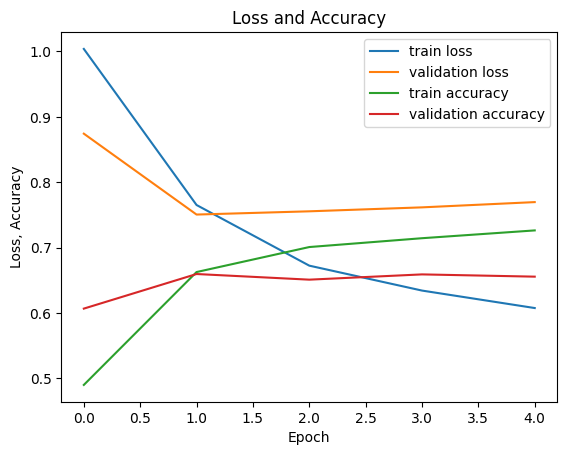

In [39]:
plt.figure()
plt.plot(np.arange(0, 5), history.history["loss"], label="train loss")
plt.plot(np.arange(0, 5), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 5), history.history["accuracy"], label="train accuracy")
plt.plot(np.arange(0, 5), history.history["val_accuracy"], label="validation accuracy")
plt.title("Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss, Accuracy")
plt.legend()

In [40]:
print(classification_report(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1)))

50/50 [==============================] - 2s 35ms/step
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       614
           1       0.33      0.40      0.36       506
           2       0.28      0.21      0.24       466

    accuracy                           0.34      1586
   macro avg       0.33      0.33      0.33      1586
weighted avg       0.34      0.34      0.34      1586



У лр 2  DecisionTreeClassifier accuracy=0.35

RNN accuracy=0.34